 1 KMeans and Gaussian Mixture [35 pts]
 KMeans and Gaussian Mixture are algorithms in machine learning that cluster observations by
 their similarities.


Importing Modules

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


 a. Load the following data set.

In [10]:
info= []
with open('hw7_data.txt') as file:
    info= [line.split() for line in file.readlines()]
X= np.array([[float(x), float(y)] for [x, y] in info])


 b. [5 pts] By visualizing the data, guess the number of clusters. Justify your answer.

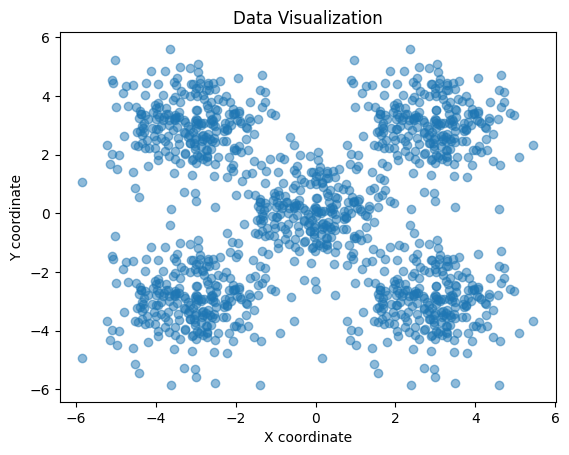

In [11]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.title("Data Visualization")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()

 c. [15 pts] In the Kmean implementation (KMeans im- do not confuse with Scikit-learn
 Kmeans), points get clustered by the initial k value the user gives to. However, it does not
 provide stability (e.g., the optimized total within-cluster variance or inertia). Modify the
 given algorithm to return the within-cluster variance. Then, visualize how the within-cluster
 converges as k changes from 1 to 15. Explain which k value is the most appropriate and
 justify your answer.

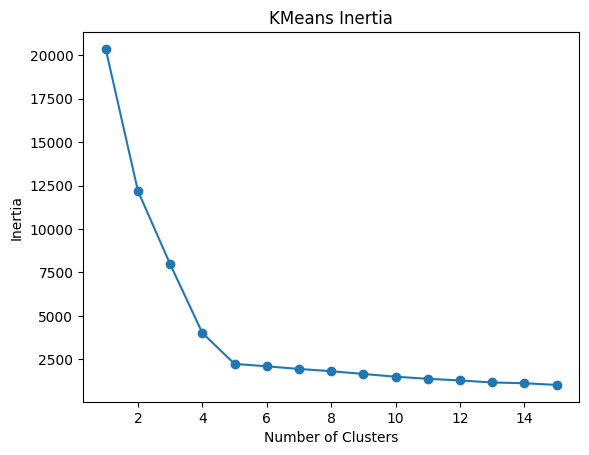

In [12]:
ks= range(1, 16)
inn= []

for k in ks:
    kmeans= KMeans(n_clusters=k, random_state=42).fit(X)
    oneI= sum(np.linalg.norm(X[i]- kmeans.cluster_centers_[kmeans.labels_[i]])**2 for i in range(len(X)))
    inn.append(oneI)

plt.plot(ks, inn, marker='o')
plt.title("KMeans Inertia")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

 d. [15 pts] Run the train gmm algorithm (the implemented Gaussian Mixture algorithm) to
 check if the k value answered in (c.) is a good choice. Visualize the change of log-likelihood
 as k increases from 1 to 15. Then, compare the visualization of clusters with KMeans results
 from (c.). Explain how results are similar and different.

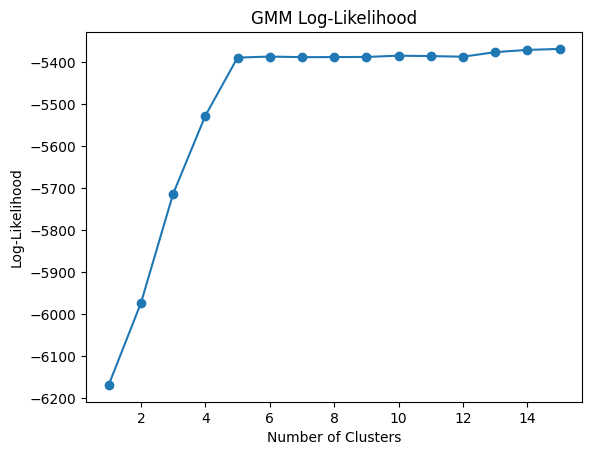

In [13]:
allLik= []

for k in ks:
    gmm= GaussianMixture(n_components=k, random_state=42).fit(X)
    allLik.append(gmm.score(X) * len(X))

plt.plot(ks, allLik, marker='o')
plt.title("GMM Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.ylabel("Log-Likelihood")
plt.show()

2 PCA[20 pts]
 In this problem, the same data set from Section 1 will be used.


 a. [10 pts] In the lecture, the algorithm of PCA and the scikit-learn example are discussed.
 Implement the PCA algorithm using NumPy.

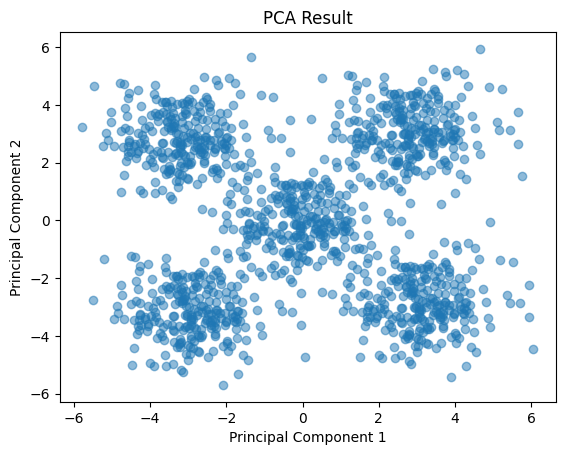

In [14]:
pca= PCA(n_components=2)
X_pca= pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("PCA Result")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


 b. [5 pts] Find the principal direction and components.

Explained variance by each component: [0.50204876 0.49795124]


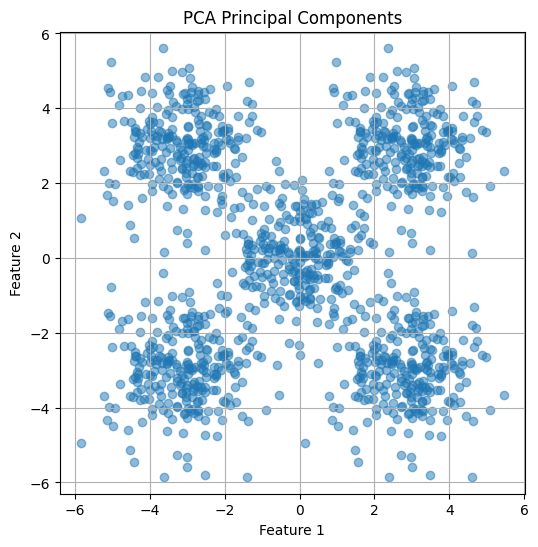

In [15]:
print("Explained variance by each component:", pca.explained_variance_ratio_)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
for length, vec in zip(pca.explained_variance_, pca.components_):
    v= vec*3*np.sqrt(length)
    ap=dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0)
    plt.annotate('', pca.mean_ + v, pca.mean_, arrowprops=ap)
plt.title('PCA Principal Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.axis('equal')
plt.show()


c. [5 pts] Perform the dimensional reduction using Scikit-learn LDA. Determine the hyperplane
 equation and projectile points to the hyperplane. Compare the visualization and explain the
 differences. To understand the differences, having the projectile in the same original space
 will be good.

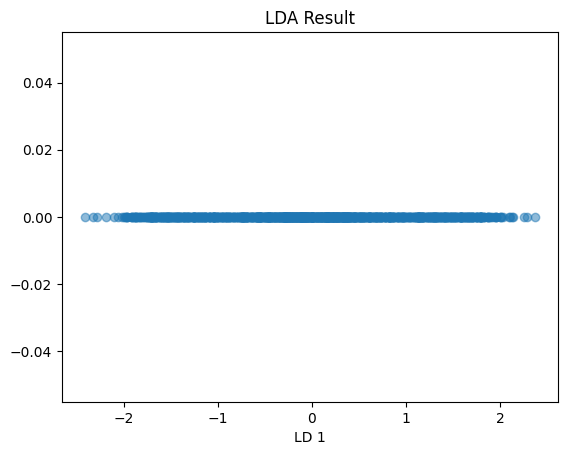

In [16]:
lda = LDA(n_components=1)
xLDA = lda.fit_transform(X, np.random.randint(0, 3, size=len(X)))

plt.scatter(xLDA, np.zeros_like(xLDA), alpha=0.5)
plt.title("LDA Result")
plt.xlabel("LD 1")
plt.show()
